### **요인분석 - 1인가구수**

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 31 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,897 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 160983 files and d

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='NanumBarunGothic') 

### 1인가구수 데이터 정제

In [ ]:
url_numofhouse = 'https://raw.githubusercontent.com/soohyeony/ds_energy/main/%EA%B0%80%EA%B5%AC%EC%9B%90%EC%88%98%EB%B3%84%20%EA%B0%80%EA%B5%AC%EC%88%98.csv'
raw_numofhouse = pd.read_csv(url_numofhouse)
raw_numofhouse

,기간,구분,일반가구수,가구원수별 가구수,가구원수별 가구수.1,가구원수별 가구수.2,가구원수별 가구수.3,가구원수별 가구수.4,가구원수별 가구수.5,가구원수별 가구수.6,평균가구원수
0,기간,구분,일반가구수,1인,2인,3인,4인,5인,6인,7인 이상,평균가구원수
1,2016,합계,"3,784,705","1,138,860","931,262","816,946","686,469","163,555","37,153","10,460",2.5
2,2016,종로구,"60,786","22,835","14,974","11,060","8,712","2,397",618,190,2.3
3,2016,중구,"51,503","19,671","13,086","9,453","6,844","1,836",480,133,2.2
4,2016,용산구,"90,164","31,641","23,505","17,580","13,121","3,327",780,210,2.3
...,...,...,...,...,...,...,...,...,...,...,...
100,2019,관악구,"242,154","119,863","55,423","34,875","24,563","5,806","1,283",341,2
101,2019,서초구,"155,377","42,667","38,892","35,327","29,850","6,704","1,503",434,2.5
102,2019,강남구,"206,524","66,073","51,560","43,435","35,800","7,671","1,564",421,2.4
103,2019,송파구,"252,212","68,861","65,402","57,821","47,607","10,014","2,038",469,2.5


In [ ]:
raw_alone = raw_numofhouse[["기간", "구분", "가구원수별 가구수"]]
df_alone = raw_alone[raw_alone['구분'] != '구분']
df_alone = df_alone[df_alone['구분'] != '합계']

In [ ]:
df_alone.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 2 to 104
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   기간         100 non-null    object
 1   구분         100 non-null    object
 2   가구원수별 가구수  100 non-null    object
dtypes: object(3)
memory usage: 3.1+ KB


In [ ]:
df_alone['가구원수별 가구수'] = df_alone['가구원수별 가구수'].str.replace(',', '')
df_alone['가구원수별 가구수'] = df_alone['가구원수별 가구수'].astype(int)
df_alone.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 2 to 104
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   기간         100 non-null    object
 1   구분         100 non-null    object
 2   가구원수별 가구수  100 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 3.1+ KB


In [ ]:
df_alone.columns = ['연도', '구', '1인가구수']
df_alone = df_alone.reset_index()
df_alone.head()

,index,연도,구,1인가구수
0,2,2016,종로구,22835
1,3,2016,중구,19671
2,4,2016,용산구,31641
3,5,2016,성동구,37074
4,6,2016,광진구,53169


In [ ]:
df_alone.to_csv('서울1인가구수.csv', encoding='cp949')

In [ ]:
df_alone[df_alone['구'] == '관악구']

,index,연도,구,1인가구수
20,22,2016,관악구,103972
45,48,2017,관악구,106865
70,74,2018,관악구,112733
95,100,2019,관악구,119863


In [ ]:
print(df_alone['1인가구수'].max()) # 관악구
print(df_alone['1인가구수'].min()) # 중구

119863
19671


In [ ]:
df_alone_pivot = df_alone.pivot(index='기간', columns='구분', values='가구원수별 가구수')
df_alone_pivot

구분,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
기간,,,,,,,,,,,,,,,,,,,,,,,,,
2016,61998,39469,36668,60988,103972,53169,42055,31728,47641,28296,52650,52954,53382,43298,38357,37074,54117,54409,32878,49453,31641,44440,22835,19671,45717
2017,62774,41050,39082,68237,106865,54866,42984,32928,49265,29469,54030,54355,54162,43418,39702,39067,54243,58848,33088,51151,33076,46535,23638,20164,47543
2018,62727,42126,40872,73011,112733,56337,44151,34564,51280,30848,55593,56872,56837,44795,41137,40706,55136,63451,34304,53477,34240,48888,25326,20803,49207
2019,66073,45188,42791,79371,119863,58714,47740,37778,53365,32653,58152,60088,59248,46449,42667,41488,57832,68861,36345,58214,35148,52814,24671,22078,52196


### 최소에너지 정제

In [ ]:
df_minEnergyScoreYearly = pd.read_csv('/content/5. 최소에너지_년별점수.csv')
# url_minEnergyScoreYearly = 'https://raw.githubusercontent.com/soohyeony/ds_energy/main/5.%20%EC%B5%9C%EC%86%8C%EC%97%90%EB%84%88%EC%A7%80_%EB%85%84%EB%B3%84%EC%A0%90%EC%88%98.csv'
df_minEnergyScoreYearly = df_minEnergyScoreYearly.rename(index={0:'2016', 1:'2017', 2:'2018', 3:'2019'})
df_minEnergyScoreYearly

,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
2016,4.666667,7.583333,8.666667,5.666667,6.666667,8.083333,7.416667,9.666667,6.416667,8.583333,7.833333,7.833333,7.500000,8.500000,6.416667,8.750000,7.083333,5.000000,6.750000,7.416667,8.666667,7.000000,9.916667,10.000000,7.750000
2017,5.083333,7.583333,8.833333,5.500000,6.666667,8.250000,7.416667,9.500000,6.500000,8.583333,7.916667,7.916667,7.416667,8.583333,6.500000,8.416667,7.333333,5.166667,6.916667,7.416667,8.833333,7.166667,9.916667,10.000000,7.916667
2018,4.916667,7.416667,8.583333,5.333333,6.416667,8.000000,7.333333,9.416667,6.416667,8.416667,7.666667,7.750000,7.333333,8.416667,6.333333,8.416667,7.250000,4.500000,6.666667,7.333333,8.500000,6.833333,9.916667,9.916667,7.500000
2019,4.833333,7.500000,8.666667,5.333333,6.583333,8.083333,7.416667,9.416667,6.583333,8.583333,7.833333,7.750000,7.416667,8.416667,6.416667,8.500000,7.083333,4.416667,6.750000,7.416667,8.666667,6.750000,9.916667,10.000000,7.666667


### 에너지바우처 정제

In [ ]:
eVoucher_url = 'https://raw.githubusercontent.com/soohyeony/ds_energy/main/%EC%97%90%EB%84%88%EC%A7%80%EB%B0%94%EC%9A%B0%EC%B2%98%EC%A0%90%EC%88%98%EC%82%B0%EC%B6%9C.csv'

raw_eVoucher = pd.read_csv(eVoucher_url)
raw_eVoucher

,연월,자치구명,65~69세,70~74세,75~79세,7세미만,80~89세,90세이상,합계,점수
0,201601,강남구,906,876,665,390,632,138,3607,3
1,201601,강동구,637,626,585,254,576,109,2787,2
2,201601,강북구,1004,1203,982,354,869,124,4536,4
3,201601,강서구,1384,1490,1420,370,1486,264,6414,6
4,201601,관악구,891,956,874,304,820,115,3960,3
...,...,...,...,...,...,...,...,...,...,...
1195,201912,용산구,721,638,607,155,660,102,2883,2
1196,201912,은평구,1711,1780,1675,429,1952,327,7874,7
1197,201912,종로구,521,428,431,73,414,85,1952,1
1198,201912,중구,552,476,430,98,473,79,2108,1


In [ ]:
raw_eVoucher['연도'] = raw_eVoucher['연월'] // 100
raw_eVoucher['연도'] = raw_eVoucher['연도'].astype(str)
raw_eVoucher

,연월,자치구명,65~69세,70~74세,75~79세,7세미만,80~89세,90세이상,합계,점수,연도
0,201601,강남구,906,876,665,390,632,138,3607,3,2016
1,201601,강동구,637,626,585,254,576,109,2787,2,2016
2,201601,강북구,1004,1203,982,354,869,124,4536,4,2016
3,201601,강서구,1384,1490,1420,370,1486,264,6414,6,2016
4,201601,관악구,891,956,874,304,820,115,3960,3,2016
...,...,...,...,...,...,...,...,...,...,...,...
1195,201912,용산구,721,638,607,155,660,102,2883,2,2019
1196,201912,은평구,1711,1780,1675,429,1952,327,7874,7,2019
1197,201912,종로구,521,428,431,73,414,85,1952,1,2019
1198,201912,중구,552,476,430,98,473,79,2108,1,2019


In [ ]:
raw_eVoucher_pivot = raw_eVoucher.pivot(index='연월', columns='자치구명', values='점수')
raw_eVoucher_pivot['연도'] = raw_eVoucher_pivot.index // 100
raw_eVoucher_pivot['연도'] = raw_eVoucher_pivot['연도'].astype(str)
raw_eVoucher_pivot

자치구명,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,연도
연월,,,,,,,,,,,,,,,,,,,,,,,,,,
201601,3,2,4,6,3,1,2,2,7,2,3,2,2,2,1,1,3,2,2,2,1,5,1,1,4,2016
201602,3,2,4,6,3,1,2,2,7,2,3,2,2,2,1,1,3,2,2,2,1,5,1,1,4,2016
201603,3,2,4,6,3,1,2,2,7,2,3,2,2,2,1,1,3,2,2,2,1,5,1,1,4,2016
201604,3,2,4,6,3,1,2,2,7,2,3,2,2,2,1,1,3,2,2,2,1,5,1,1,4,2016
201605,3,2,4,6,3,1,2,2,7,2,3,2,2,2,1,1,3,2,2,2,1,5,1,1,4,2016
201606,3,2,4,6,3,1,2,2,7,2,3,2,2,2,1,1,3,2,2,2,1,5,1,1,4,2016
201607,3,2,4,6,3,1,2,2,7,2,3,2,2,2,1,1,3,2,2,2,1,5,1,1,4,2016
201608,3,2,4,6,3,1,2,2,7,2,3,2,2,2,1,1,3,2,2,2,1,5,1,1,4,2016
201609,3,2,4,6,3,1,2,2,7,2,3,2,2,2,1,1,3,2,2,2,1,5,1,1,4,2016


In [ ]:
df_eVoucherYearly = raw_eVoucher_pivot.groupby('연도').mean()
df_eVoucherYearly

자치구명,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
연도,,,,,,,,,,,,,,,,,,,,,,,,,
2016,3.0,2.000000,4.00,6.000000,3.000000,1.00,2.000000,2.00,7.000000,2.000000,3.00,2.000000,2.000000,2.00,1.0,1.000000,3.000000,2.000000,2.000000,2.000000,1.00,5.000000,1.0,1.0,4.000000
2017,3.0,2.000000,4.00,6.000000,3.666667,1.00,2.000000,2.00,7.333333,2.000000,3.00,2.000000,2.000000,2.00,1.0,1.000000,3.000000,2.000000,2.000000,2.000000,1.00,5.000000,1.0,1.0,4.000000
2018,3.0,2.166667,4.25,7.083333,4.166667,1.25,2.166667,2.25,8.166667,2.583333,3.25,2.166667,2.000000,2.25,1.0,1.666667,3.250000,2.166667,2.583333,2.166667,1.25,5.250000,1.0,1.0,4.250000
2019,4.0,3.166667,5.75,8.666667,5.250000,2.00,3.083333,3.00,9.750000,3.166667,4.75,3.250000,2.916667,3.00,1.0,2.166667,4.333333,3.583333,4.000000,3.000000,2.00,6.916667,1.0,1.0,6.416667


### 연료비비율 정제

In [ ]:
url_eRatio = 'https://raw.githubusercontent.com/soohyeony/ds_energy/main/elecbill_income_ratio_total.csv'
raw_eRatio = pd.read_csv(url_eRatio, encoding='cp949')
raw_eRatio

,년월,시군구,년월.1,월전기요금total(원),월근로소득(원),전기요금/근로소득(%),ratio_score,score,연도,월
0,201601,강남구,201601,1.013515e+10,2.660255e+12,0.003810,38.098408,1,2016,1
1,201602,강남구,201602,9.609392e+09,2.660255e+12,0.003612,36.122073,1,2016,2
2,201603,강남구,201603,8.362896e+09,2.660255e+12,0.003144,31.436445,1,2016,3
3,201604,강남구,201604,8.216144e+09,2.660255e+12,0.003088,30.884798,1,2016,4
4,201605,강남구,201605,7.757322e+09,2.660255e+12,0.002916,29.160071,1,2016,5
...,...,...,...,...,...,...,...,...,...,...
1195,201908,중랑구,201908,5.916520e+09,1.414834e+11,0.041818,418.177635,5,2019,8
1196,201909,중랑구,201909,4.847380e+09,1.414834e+11,0.034261,342.611153,4,2019,9
1197,201910,중랑구,201910,3.618930e+09,1.414834e+11,0.025578,255.784714,3,2019,10
1198,201911,중랑구,201911,3.742202e+09,1.414834e+11,0.026450,264.497596,3,2019,11


In [ ]:
raw_eRatio_pivot = raw_eRatio.pivot(index = '년월', columns='시군구', values='score')
raw_eRatio_pivot['연도'] = raw_eRatio_pivot.index // 100
raw_eRatio_pivot

시군구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,연도
년월,,,,,,,,,,,,,,,,,,,,,,,,,,
201601,1,3,6,2,4,3,2,1,5,6,3,3,1,2,1,1,4,2,4,1,1,7,1,1,5,2016
201602,1,3,7,2,4,3,2,1,5,6,3,3,1,2,1,1,4,2,4,1,1,7,1,1,5,2016
201603,1,3,5,2,4,3,2,1,4,5,2,2,1,2,1,1,4,1,3,1,1,6,1,1,4,2016
201604,1,3,5,2,4,3,2,1,4,5,2,2,1,2,1,1,4,1,3,1,1,6,1,1,4,2016
201605,1,2,5,2,3,2,1,1,4,4,2,2,1,2,1,1,3,1,3,1,1,5,1,1,4,2016
201606,1,2,5,2,3,3,1,1,4,5,2,2,1,2,1,1,3,1,3,1,1,5,1,1,4,2016
201607,1,3,6,2,4,3,2,1,4,5,3,3,1,2,1,1,4,2,4,1,1,6,1,1,5,2016
201608,1,5,10,3,6,5,3,1,6,8,4,4,2,3,2,2,6,2,7,1,1,10,1,1,8,2016
201609,1,2,4,1,3,2,1,1,3,4,2,2,1,2,1,1,3,1,3,1,1,5,1,1,3,2016


In [ ]:
df_eRatioYearly = raw_eRatio_pivot.groupby('연도').mean()
df_eRatioYearly

시군구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
연도,,,,,,,,,,,,,,,,,,,,,,,,,
2016,1.0,2.666667,5.583333,1.916667,3.833333,2.916667,1.666667,1.0,4.166667,5.166667,2.416667,2.416667,1.083333,2.083333,1.083333,1.083333,3.666667,1.333333,3.583333,1.0,1.0,6.166667,1.0,1.0,4.500000
2017,1.0,2.083333,4.666667,1.333333,3.416667,2.500000,1.250000,1.0,3.416667,4.416667,2.083333,2.333333,1.083333,2.000000,1.000000,1.083333,3.166667,1.083333,3.250000,1.0,1.0,4.750000,1.0,1.0,3.916667
2018,1.0,2.083333,4.500000,1.083333,3.416667,2.416667,1.250000,1.0,3.333333,4.333333,2.166667,2.333333,1.083333,2.083333,1.000000,1.083333,3.083333,1.083333,3.083333,1.0,1.0,4.583333,1.0,1.0,3.833333
2019,1.0,1.916667,4.250000,1.083333,3.083333,2.166667,1.166667,1.0,3.083333,3.666667,2.000000,2.166667,1.000000,1.833333,1.000000,1.000000,2.833333,1.083333,2.750000,1.0,1.0,4.416667,1.0,1.0,3.416667


### 1인가구수&기준3가지 시각화

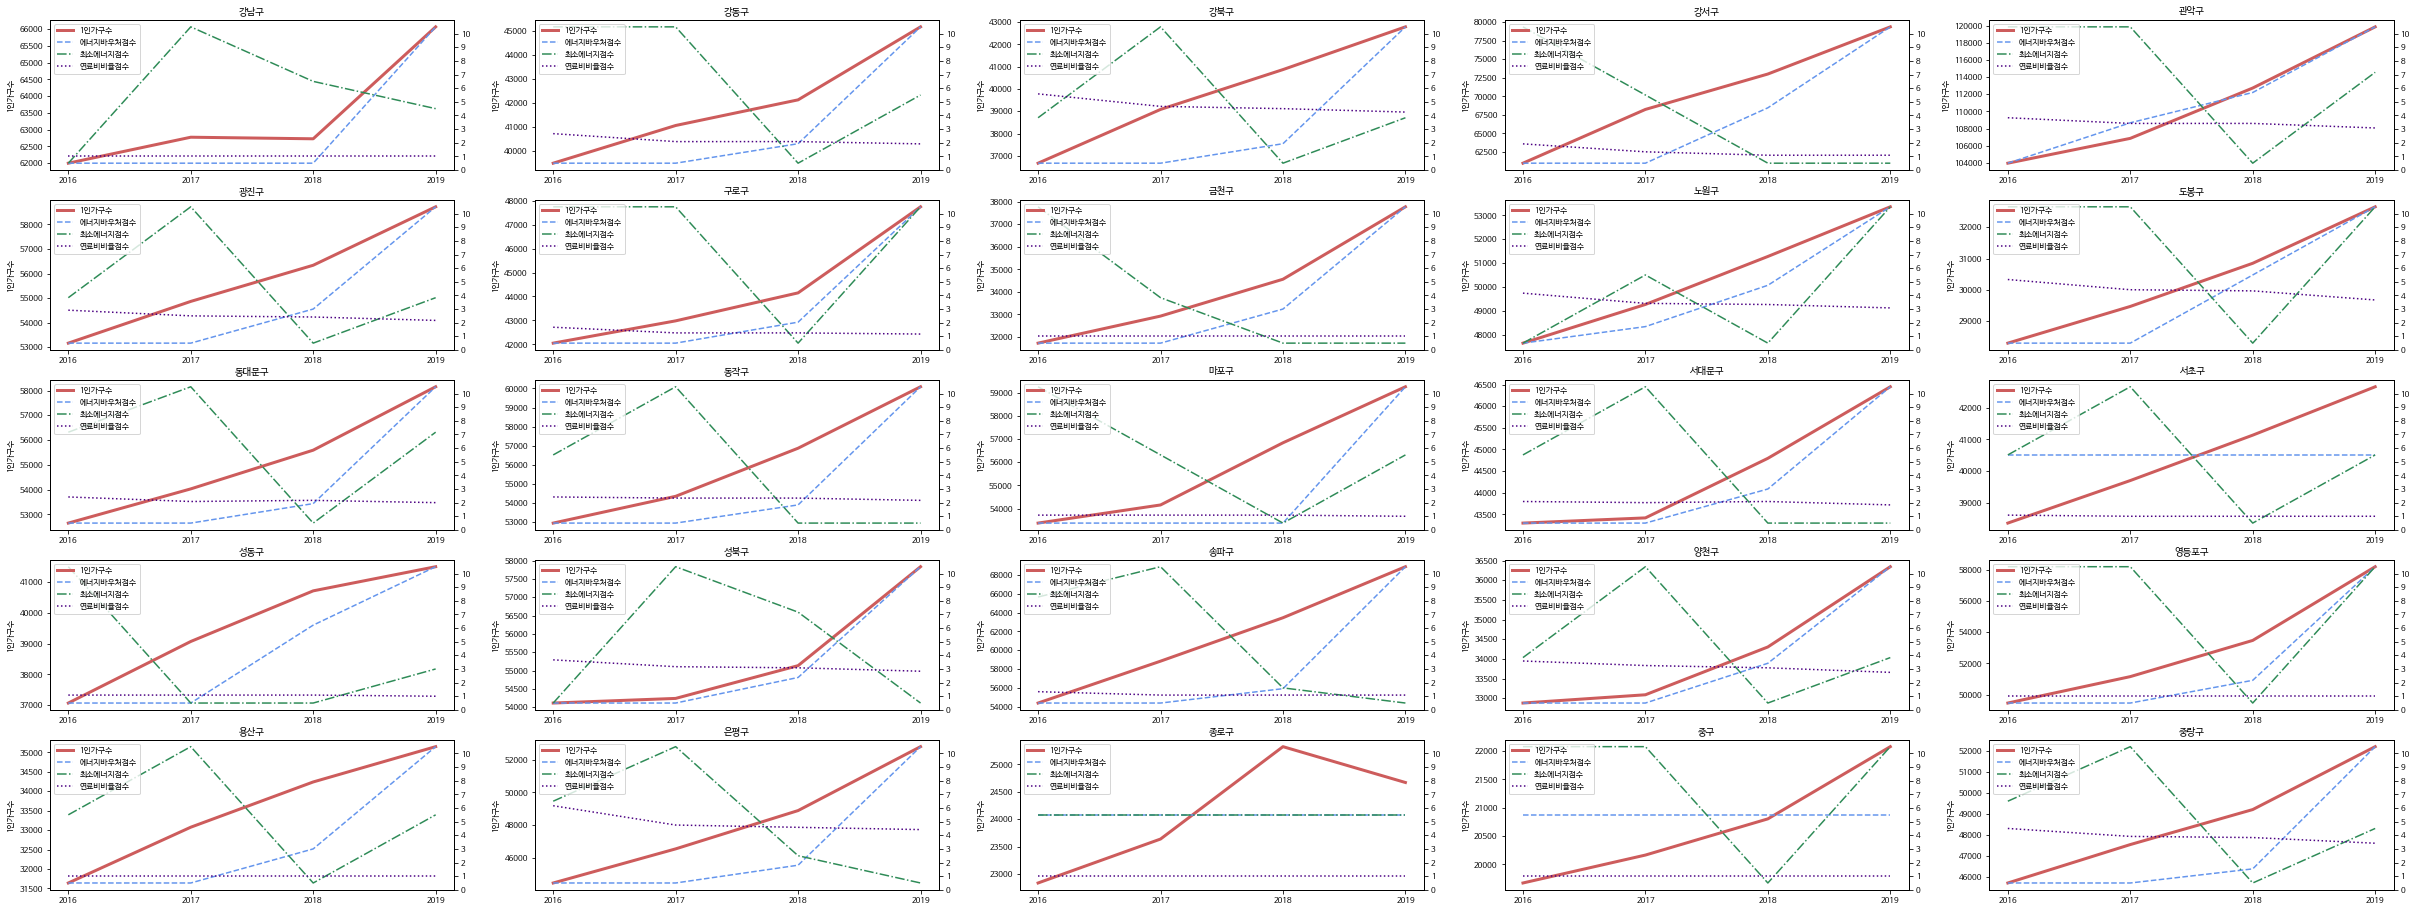

In [ ]:
plt.rcParams['figure.figsize'] = (42, 16)
plt.rcParams['font.size'] = 8
guList = ['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구',
       '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구']

for n in np.arange(0,25):
  x = ['2016', '2017', '2018', '2019']
  gu_name = guList[n]
  y1 = df_alone_pivot[gu_name]
  y2 = df_eVoucherYearly[gu_name]
  y3 = df_minEnergyScoreYearly[gu_name]
 
  y4 = df_eRatioYearly[gu_name]

  ax1 = plt.subplot(5,5,n+1)
  
  ax1.set_ylabel('1인가구수')
  line1 = ax1.plot(x, y1, color='indianred', label='1인가구수', linewidth=3.0)

  ax2 = ax1.twinx()
  ax2.set_ylabel('점수')
  line2 = ax2.plot(x, y2, color='cornflowerblue', linestyle='dashed', label='에너지바우처')
  ax2.axes.yaxis.set_visible(False)

  ax3 = ax2.twinx()
  line3 = ax3.plot(x, y3, color='seagreen', linestyle='-.', label='최소에너지')
  ax3.axes.yaxis.set_visible(False)

  ax4 = ax3.twinx()
  line4 = ax4.plot(x, y4, color='indigo', linestyle=':', label='연료비비비율')
  # ax4.axes.yaxis.set_visible(False)
  ax4.set(ylim=(0,11))  

  plt.title(gu_name)
  lines = line1 + line2 + line3 + line4
  plt.legend(lines,['1인가구수', '에너지바우처점수', '최소에너지점수', '연료비비율점수'], loc='upper left')
  plt.yticks(np.arange(0,11))

plt.show()

# 1인 가구수 증가에 따라 대다수의 지역에서 에너지바우처, 최소에너지점수도 증가하는 경향이 있다.
# 이를 통해 65세이상 독거노인 가구와 에너지사용량이 낮은 가구가 증가하고 있다는 것을 유추할 수 있다.
# 